In [1]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
import math

## Точечные оценки

In [3]:
def mean(sample, n): # выборочное среднее
    return sum(sample) / n

def median(sample, n): # выборочная медиана
    if n % 2 == 1: return sorted(sample)[n // 2]
    else: return (sorted(sample)[n // 2 - 1] + sorted(sample)[n // 2]) / 2

def variance(sample, n): # выборочная дисперсия
    mu = mean(sample, n)
    return sum([(x - mu) ** 2 for x in sample]) / n

def corrected_variance(sample, n): # исправленная выборочная дисперсия
    v = variance(sample, n)
    return v * n / (n - 1)

def quantile(sample, n, q): # выборочные квантили
    if not n * q == math.floor(n * q): return sorted(sample)[math.floor(n * q)]
    else: return (sorted(sample)[math.floor(n * q) - 1] + sorted(sample)[math.floor(n * q)]) / 2

def central_moment(sample, n, k): # выборочные центральные моменты
    mu = mean(sample, n)
    return sum([(x - mu) ** k for x in sample]) / n

def skewness(sample, n): # коэффициент асимметрии
    return central_moment(sample, n, 3) / variance(sample, n) ** 1.5

def kurtoses(sample, n): # эксцесс
    return central_moment(sample, n, 4) / (variance(sample, n) ** 2) - 3

def var_coef(sample, n): # коэффициент вариации
    return corrected_variance(sample, n) ** 0.5 / abs(mean(sample, n))

def get_statistics_lib_funcs(sample):
    print(f'Выборочное среднее: {np.mean(sample)}')
    print(f'Выборочная медиана: {np.median(sample)}')
    print(f'Выборочная дисперсия: {np.var(sample)}')
    print(f'Исправленная выборочная дисперсия: {np.var(sample,ddof=1)}')
    print(f'1/4 и 3/4 квантиль: {np.quantile(sample, 1/4)}, {np.quantile(sample, 3/4)}')
    print(f'Коэффициент асимметрии: {sps.moment(sample, 3) / sps.moment(sample, 2) ** 1.5}')
    print(f'Коэффициент эксцесса: {sps.moment(sample, 4) / sps.moment(sample, 2) ** 2 - 3}')
    print(f'Коэффициент вариации: {var_coef(sample, n)}')
    print()

def get_statistics(sample, n):
    print(f'Выборочное среднее: {mean(sample, n)}')
    print(f'Выборочная медиана: {median(sample, n)}')
    print(f'Выборочная дисперсия: {variance(sample, n)}')
    print(f'Исправленная выборочная дисперсия: {corrected_variance(sample, n)}')
    print(f'1/4 и 3/4 выборочные квартили: {quantile(sample, n, 1/4)}, {quantile(sample, n, 3/4)}')
    print(f'Коэффициент асимметрии: {skewness(sample, n)}')
    print(f'Коэффициент эксцесса: {kurtoses(sample, n)}')
    print(f'Коэффициент вариации: {var_coef(sample, n)}')
    print()

In [4]:
n = 200

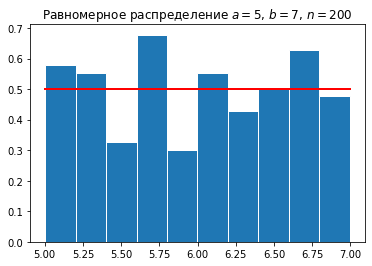

Выборочное среднее: 5.996897720431978
Выборочная медиана: 6.026448821128792
Выборочная дисперсия: 0.3524601352754806
Исправленная выборочная дисперсия: 0.35423129173415135
1/4 и 3/4 выборочные квартили: 5.504838659234268, 6.521756902068952
Коэффициент асимметрии: -0.039951221042641566
Коэффициент эксцесса: -1.2520130685483228
Коэффициент вариации: 0.09924687011492998



In [56]:
a = 5
b = 7
uniform_distribution = sps.uniform(a, b - a)
uniform_sample = uniform_distribution.rvs(n)

plt.title(f'Равномерное распределение $a = {a}$, $b = {b}$, $n = {n}$')
plt.hist(uniform_sample, density=True, stacked=True, edgecolor='white')
grid = np.linspace(min(uniform_sample), max(uniform_sample), n)
plt.plot(grid, uniform_distribution.pdf(grid), lw=2, color='red')
plt.show()

get_statistics(uniform_sample, n)

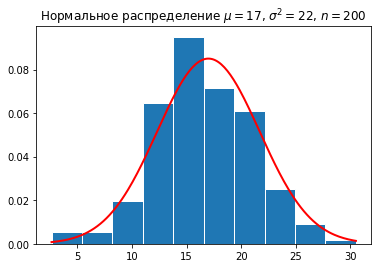

Выборочное среднее: 16.43454052315044
Выборочная медиана: 16.39277967514419
Выборочная дисперсия: 20.084900270055954
Исправленная выборочная дисперсия: 20.18582941714166
1/4 и 3/4 выборочные квартили: 13.25841488521609, 19.599528458309713
Коэффициент асимметрии: -0.06669023538162296
Коэффициент эксцесса: 0.23156032022118955
Коэффициент вариации: 0.27337936654171985



In [71]:
gauss_exp = 17
gauss_var = 22
gauss_distribution = sps.norm(gauss_exp, gauss_var**0.5)
gauss_sample = gauss_distribution.rvs(n)

plt.title(f'Нормальное распределение $\mu = {gauss_exp}$, $\sigma^2 = {gauss_var}$, $n = {n}$')
plt.hist(gauss_sample, density=True, stacked=True, edgecolor = 'white')
grid = np.linspace(min(gauss_sample), max(gauss_sample), n)
plt.plot(grid, gauss_distribution.pdf(grid), lw=2, color='red')
plt.show()

get_statistics(gauss_sample, n)

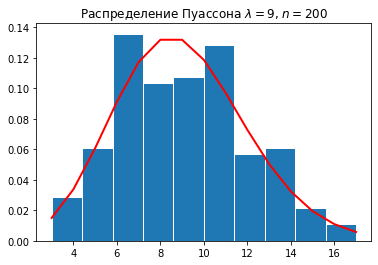

Выборочное среднее: 9.055
Выборочная медиана: 9.0
Выборочная дисперсия: 8.691975000000006
Исправленная выборочная дисперсия: 8.735653266331665
1/4 и 3/4 выборочные квартили: 7.0, 11.0
Коэффициент асимметрии: 0.25523705314751455
Коэффициент эксцесса: -0.3885219665410342
Коэффициент вариации: 0.3264068311533366



In [5]:
n = 200
poission_lambda = 9
poisson_distribution = sps.poisson(poission_lambda)
poisson_sample = poisson_distribution.rvs(n)

plt.title(f'Распределение Пуассона $\lambda = {poission_lambda}$, $n = {n}$')
plt.hist(poisson_sample, density=True, stacked=True, edgecolor = 'white')
grid = np.linspace(math.ceil(min(poisson_sample)), math.floor(max(poisson_sample)), math.floor(max(poisson_sample)) - math.ceil(min(poisson_sample)) + 1)
plt.plot(grid, poisson_distribution.pmf(grid), lw=2, color='red')
plt.show()

get_statistics(poisson_sample, n)

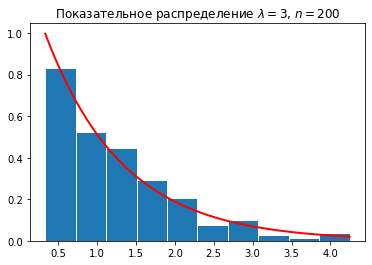

Выборочное среднее: 1.2375961048887687
Выборочная медиана: 1.010764277091405
Выборочная дисперсия: 0.6400588298230285
Исправленная выборочная дисперсия: 0.6432752058522899
1/4 и 3/4 выборочные квартили: 0.5892909151492681, 1.6780873931638713
Коэффициент асимметрии: 1.3185867260765745
Коэффициент эксцесса: 1.7821514265931704
Коэффициент вариации: 0.6480663507902059



In [8]:
exp_param = 3
exponential_distribution = sps.expon(1 / exp_param)
exponential_sample = exponential_distribution.rvs(n)

plt.title(f'Показательное распределение $\lambda = {exp_param}$, $n = {n}$')
plt.hist(exponential_sample, density=True, stacked=True, edgecolor = 'white')
grid = np.linspace(min(exponential_sample), max(exponential_sample), n)
plt.plot(grid, exponential_distribution.pdf(grid), lw=2, color='red')
plt.show()

get_statistics(exponential_sample, n)

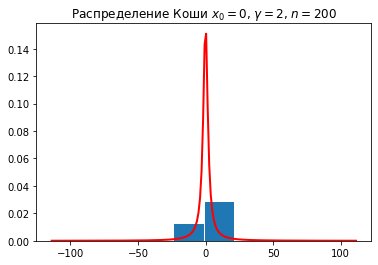

Выборочное среднее: -1.3170212236941061
Выборочная медиана: -0.021328020964212175
Выборочная дисперсия: 221.02141390465164
Исправленная выборочная дисперсия: 222.1320742760318
1/4 и 3/4 выборочные квартили: -1.8486569554259837, 2.2848986285966704
Коэффициент асимметрии: -0.7849412867776171
Коэффициент эксцесса: 33.42746802818129
Коэффициент вариации: 11.316519142681717



In [60]:
cauchy_shift = 0
cauchy_scale = 2
cauchy_distribution = sps.cauchy(cauchy_shift, cauchy_scale)
cauchy_sample = cauchy_distribution.rvs(n)

plt.hist(cauchy_sample, density=True, stacked=True, edgecolor = 'white')
plt.title(f'Распределение Коши $x_0 = {cauchy_shift}$, $\gamma = {cauchy_scale}$, $n = {n}$')
grid = np.linspace(min(cauchy_sample), max(cauchy_sample), n)
plt.plot(grid, cauchy_distribution.pdf(grid), lw=2, color='red')
plt.show()

get_statistics(cauchy_sample, n)

# Интервальные оценки для Гауссовского распределения

In [61]:
def conf_interval_for_exp(sample, n, alpha, var):
    point_exp = mean(sample, n)
    u_half_alpha = - sps.norm.ppf(alpha / 2)
    lower_boundary = point_exp - (var / n) ** 0.5 * u_half_alpha
    upper_boundary = point_exp + (var / n) ** 0.5 * u_half_alpha
    return lower_boundary, upper_boundary

def conf_interval_for_var(sample, n, alpha):
    s2 = corrected_variance(sample, n)
    lower_boundary = (n - 1) * s2 / sps.chi2.ppf(1 - alpha / 2, n - 1)
    upper_boundary = (n - 1) * s2 / sps.chi2.ppf(alpha / 2, n - 1)
    return lower_boundary, upper_boundary

In [62]:
alpha = 0.05 # ошибка
gauss_exp = 4
gauss_var = 9

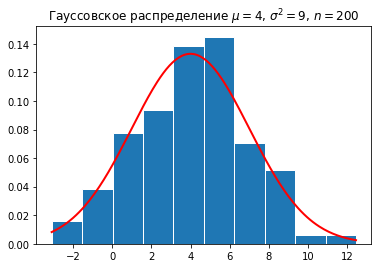

Точечная оценка мат.ожидания: 4.070415616314483
Доверительный интервал для мат.ожидания с ошибкой 0.05: [3.6546444690095794, 4.486186763619386]
Точечная оценка дисперсии: 8.214611560926649
Доверительный интервал для дисперсии с ошибкой 0.05: [6.812426521712778, 10.101626797621224]


In [63]:
gauss_distribution = sps.norm(gauss_exp, gauss_var ** 0.5)
gauss_sample = gauss_distribution.rvs(n)

plt.title(f'Гауссовское распределение $\mu = {gauss_exp}$, $\sigma^2 = {gauss_var}$, $n = {n}$')
plt.hist(gauss_sample, density=True, stacked=True, edgecolor = 'white')
grid = np.linspace(min(gauss_sample), max(gauss_sample), n)
plt.plot(grid, gauss_distribution.pdf(grid), lw=2, color='red')
plt.show()

lower_boundary_exp, upper_boundary_exp = conf_interval_for_exp(gauss_sample, n, alpha, gauss_var)
print(f"Точечная оценка мат.ожидания: {mean(gauss_sample, n)}")
print(f"Доверительный интервал для мат.ожидания с ошибкой {alpha}: [{lower_boundary_exp}, {upper_boundary_exp}]")

lower_boundary_var, upper_boundary_var = conf_interval_for_var(gauss_sample, n, alpha)
print(f"Точечная оценка дисперсии: {corrected_variance(gauss_sample, n)}")
print(f"Доверительный интервал для дисперсии с ошибкой {alpha}: [{lower_boundary_var}, {upper_boundary_var}]")

## Интервальные оценки для Гауссовского распределения c группированием

In [64]:
def group_data(sample, k):
    sample = sorted(sample)
    x0 = math.floor(min(sample))
    xn = math.ceil(max(sample))
    bounds = [x0 + i * (xn - x0) / k for i in range(k + 1)]
    intervals = [(bounds[i], bounds[i + 1]) for i in range(np.size(bounds) - 1)]
    grouped_sample_row = [(a + b) / 2 for (a, b) in intervals]
    grouped_sample_n = np.zeros(np.size(grouped_sample_row))
    for i in range(np.size(sample)):
        entry_interval = [j for j in range(k) if intervals[j][0] <= sample[i] <= intervals[j][1]][0]
        grouped_sample_n[entry_interval] += 1

    return grouped_sample_row, grouped_sample_n, bounds[1] - bounds[0]

def mean_for_group(grouped_sample_row, grouped_sample_n, n):
    sum = 0
    for i in range(np.size(grouped_sample_row)):
        sum += grouped_sample_row[i] * grouped_sample_n[i]
    return sum / n

def corrected_variance_for_group(grouped_sample_row, grouped_sample_n, k, n):
    exp = mean_for_group(grouped_sample_row, grouped_sample_n, n)
    sum = 0
    for i in range(np.size(grouped_sample_row)):
        sum += grouped_sample_n[i] * (grouped_sample_row[i] - exp) ** 2
    return (sum / n) * k / (k - 1)

def conf_interval_for_student_exp(grouped_sample_row, grouped_sample_n, k, n, alpha):
    point_exp = mean_for_group(grouped_sample_row, grouped_sample_n, n)
    s2 = corrected_variance_for_group(grouped_sample_row, grouped_sample_n, k, n)
    t_half_alpha = - sps.t.ppf(alpha / 2, k - 1)
    lower_boundary = point_exp - t_half_alpha * (s2 / k) ** 0.5
    upper_boundary = point_exp + t_half_alpha * (s2 / k) ** 0.5
    return lower_boundary , upper_boundary

def conf_interval_for_student_var(grouped_sample_row, grouped_sample_n, k, n, alpha):
    s2 = corrected_variance_for_group(grouped_sample_row, grouped_sample_n, k, n)
    lower_boundary = (k - 1) * s2 / sps.chi2.ppf(1 - alpha / 2, k - 1)
    upper_boundary = (k - 1) * s2 / sps.chi2.ppf(alpha / 2, k - 1)
    return lower_boundary, upper_boundary

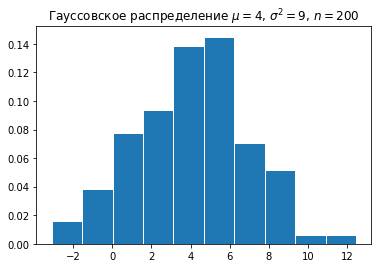

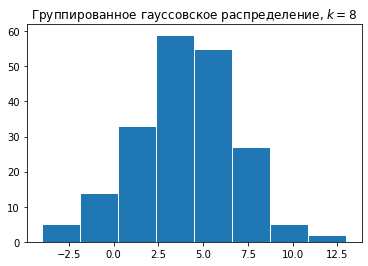

Точечная оценка мат.ожидания для группированной выборки: 4.0325
Доверительный интервал для мат.ожидания группированной выборки с ошибкой 0.05: [1.4904002931459885, 6.574599706854011]
Точечная оценка дисперсии для группированной выборки: 9.245935714285713
Доверительный интервал для дисперсии группированной выборки с ошибкой 0.05: [4.041872401915328, 38.299739849718705]


In [65]:
k = 8
plt.title(f'Гауссовское распределение $\mu = {gauss_exp}$, $\sigma^2 = {gauss_var}$, $n = {n}$')
plt.hist(gauss_sample, density=True, stacked=True, edgecolor = 'white')
plt.show()

grouped_sample_row, grouped_sample_n, interval_length = group_data(gauss_sample, k)
plt.title(f'Группированное гауссовское распределение, $k = {k}$')
plt.bar(grouped_sample_row, grouped_sample_n, width = interval_length, edgecolor='white')
plt.show()

lower_boundary_exp, upper_boundary_exp = conf_interval_for_student_exp(grouped_sample_row, grouped_sample_n, k, n, alpha)
print(f"Точечная оценка мат.ожидания для группированной выборки: {mean_for_group(grouped_sample_row, grouped_sample_n, n)}")
print(f"Доверительный интервал для мат.ожидания группированной выборки с ошибкой {alpha}: [{lower_boundary_exp}, {upper_boundary_exp}]")
lower_boundary_var, upper_boundary_var = conf_interval_for_student_var(grouped_sample_row, grouped_sample_n, k, n, alpha)
print(f"Точечная оценка дисперсии для группированной выборки: "
      f"{corrected_variance_for_group(grouped_sample_row, grouped_sample_n, k, n)}")
print(f"Доверительный интервал для дисперсии группированной выборки с ошибкой {alpha}: [{lower_boundary_var}, {upper_boundary_var}]")